In [123]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [124]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [126]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [127]:
df.drop_duplicates(inplace=True)

In [128]:
df.fillna(df.mean(), inplace=True)

In [129]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [130]:
df.size

1000

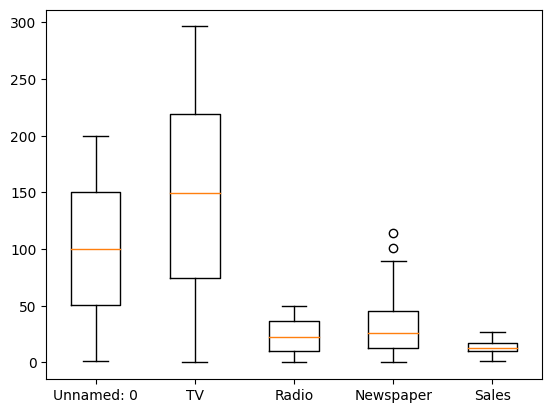

In [131]:
plt.boxplot(df,data = df,labels=df.columns)
plt.show()

<Axes: xlabel='Newspaper', ylabel='Count'>

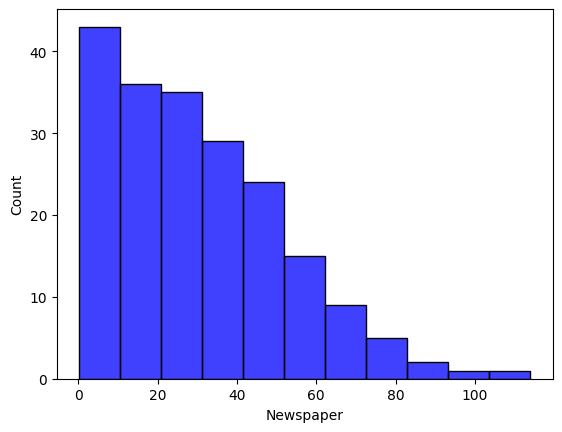

In [132]:
sns.histplot(df['Newspaper'], color='blue')

<Axes: xlabel='Radio', ylabel='Count'>

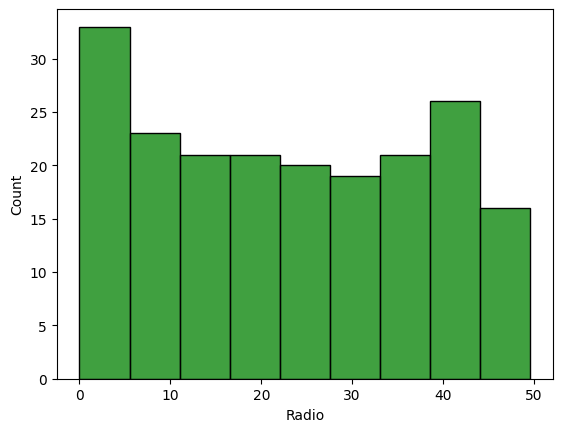

In [133]:
sns.histplot(df['Radio'], color='green')

<Axes: xlabel='Sales', ylabel='Count'>

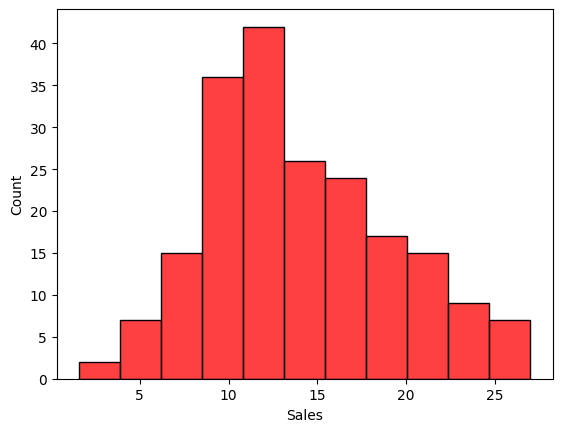

In [134]:
sns.histplot(df['Sales'], color='red')

<Axes: xlabel='TV', ylabel='Count'>

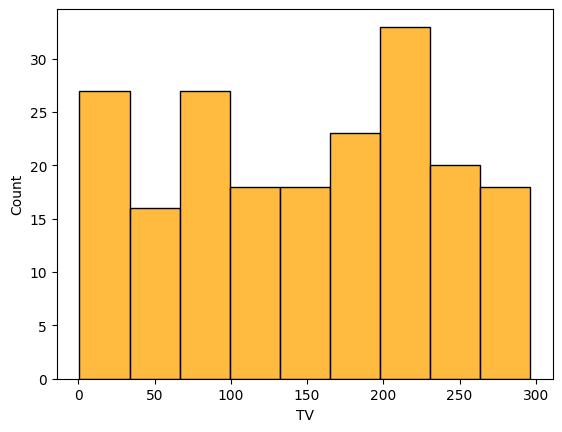

In [135]:
sns.histplot(df['TV'], color='orange')

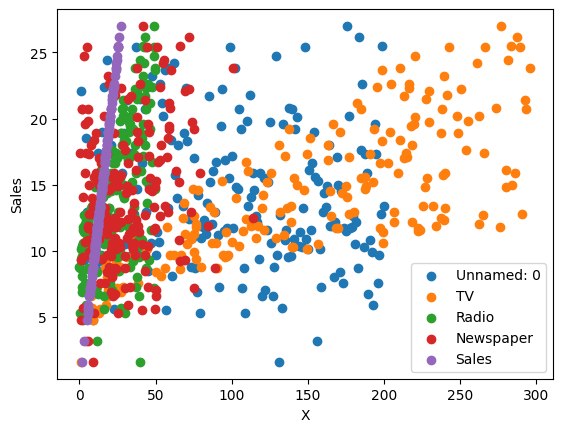

In [136]:
def scatplot():
    i = df.columns
    for col in i:
        plt.scatter(df[col], df['Sales'], label=col)  # Create a scatter plot for each column
    plt.xlabel('X')
    plt.ylabel('Sales')
    plt.legend()
    colormap = np.array(['r', 'g', 'b'])
    plt.show()
scatplot()

In [137]:
x=df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [138]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [139]:
xtrain,ytrain

(     Unnamed: 0     TV  Radio  Newspaper
 71           72  109.8   14.3       31.7
 90           91  134.3    4.9        9.3
 100         101  222.4    4.3       49.8
 44           45   25.1   25.7       43.3
 94           95  107.4   14.0       10.9
 ..          ...    ...    ...        ...
 58           59  210.8   49.6       37.7
 21           22  237.4    5.1       23.5
 49           50   66.9   11.7       36.8
 64           65  131.1   42.8       28.9
 68           69  237.4   27.5       11.0
 
 [140 rows x 4 columns],
      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [140]:
xtest,ytest

(     Unnamed: 0     TV  Radio  Newspaper
 56           57    7.3   28.1       41.4
 37           38   74.7   49.4       45.7
 67           68  139.3   14.5       10.2
 79           80  116.0    7.7       23.1
 80           81   76.4   26.7       22.3
 188         189  286.0   13.9        3.7
 183         184  287.6   43.0       71.8
 10           11   66.1    5.8       24.2
 128         129  220.3   49.0        3.2
 62           63  239.3   15.5       27.3
 65           66   69.0    9.3        0.9
 17           18  281.4   39.6       55.8
 133         134  219.8   33.5       45.1
 195         196   38.2    3.7       13.8
 146         147  240.1    7.3        8.7
 38           39   43.1   26.7       35.1
 173         174  168.4    7.1       12.8
 149         150   44.7   25.8       20.6
 93           94  250.9   36.5       72.3
 29           30   70.6   16.0       40.8
 0             1  230.1   37.8       69.2
 2             3   17.2   45.9       69.3
 122         123  224.0    2.4    

In [141]:

model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(data)

    Predicted Sales
0          8.457029
1         15.415675
2         12.119863
3          9.780154
4         11.400214
5         18.663802
6         23.859214
7          7.199420
8         22.049449
9         16.862563
10         7.970562
11        23.134505
12        19.125255
13         5.403537
14        15.384840
15         9.877649
16        12.022268
17         9.726057
18        21.071559
19         9.199838
20        20.436606
21        12.118128
22        13.763441
23        10.669554
24        16.200354
25         7.752415
26        20.556441
27        20.370416
28         9.012871
29        14.209878
30        17.364762
31        15.184736
32        17.232417
33        19.033046
34        17.074332
35        12.231838
36        12.822514
37         6.011883
38        10.019618
39        13.433472
40        12.003891
41         9.675572
42         5.318051
43        10.167342
44        14.173337
45        13.977915
46        14.266646
47        10.465717
48        21.076015
